In [1]:
# 패키지
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  itertools import combinations
from sklearn import linear_model
sns.set(palette='pastel')
sns.set(font_scale=2)

In [2]:
labels=pd.read_csv('FE and error_set/error_set_0.741.csv')

In [3]:
train_data=pd.read_csv('wook_workspace/X_train_extreme.csv')
test_data=pd.read_csv('wook_workspace/X_test_extreme.csv')

In [4]:
#Features ver 2
train_features_ver2=pd.read_csv('Features/train_ver2.csv')
test_features_ver2=pd.read_csv('Features/test_ver2.csv')

In [5]:
#cluster : hongmun/exp/both/no
train_group_user=pd.read_csv('train_group_user_df.csv')
test_group_user=pd.read_csv('test_group_user_df.csv')


In [6]:
#hongmun, exp, 등 의 존재 유무에 따른 주차 cnt
train_all_df=pd.read_csv('Features/train_exp_hongmun_cnt_with_week.csv')
test_all_df=pd.read_csv('Features/test_exp_hongmun_cnt_with_week.csv')

In [7]:
train_data=pd.read_csv('X_train_final.csv')
test_data=pd.read_csv('X_test_final.csv')

In [8]:
#concating
train_feature_ver3=pd.concat([train_features_ver2,train_all_df],1)
test_feature_ver3=pd.concat([test_features_ver2,test_all_df],1)

In [9]:
#concating2
train_feature_ver4=pd.concat([train_feature_ver3,train_group_user],1)
test_feature_ver4=pd.concat([test_feature_ver3,test_group_user],1)

In [10]:
#party ratio
train_party_ratio=pd.read_csv('jimmy_workspace/train_party_differ.csv')
test_party_ratio=pd.read_csv('jimmy_workspace/test_party_differ.csv')

In [11]:
train_feature_ver4['party_enter_differ_ratio']=train_party_ratio.iloc[:,1]
test_feature_ver4['party_enter_differ_ratio']=test_party_ratio.iloc[:,1]

In [12]:
train_feature_ver4.to_csv('train_feature_final_added.csv',index=False)
test_feature_ver4.to_csv('test_feature_final_addaed.csv',index=False)

In [13]:
train_data_c=train_data.copy()
test_data_c=test_data.copy()

In [14]:
train_act=pd.read_csv('transformed/train_real_values.csv')
test_act=pd.read_csv('transformed/test_real_datas_int.csv')


In [15]:
train_act_c=train_act.copy()
test_act_c=test_act.copy()

In [16]:
train_act_group=pd.read_csv('train_group_act_df.csv')
test_act_group=pd.read_csv('train_group_act_df.csv')

In [17]:
labels_copy=labels.copy()

In [18]:
labels_copy.index=labels_copy.new_id

In [19]:
train_act_c['label']=labels_copy.loc[(train_act_c.new_id),'label'].reset_index(drop=True)

In [20]:
labels_copy.head()

,new_id,label,y_pred
new_id,,,
tr0,tr0,month,2month
tr1,tr1,week,week
tr2,tr2,retained,retained
tr3,tr3,week,week
tr4,tr4,retained,retained


In [21]:
train_act_c['making_cnt']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          2.0
7          0.0
8         16.0
9          4.0
10        14.0
11         7.0
12         0.0
13        35.0
14         0.0
15         0.0
16         0.0
17         0.0
18         0.0
19         0.0
20         0.0
21         0.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
          ... 
440548    16.0
440549    14.0
440550    10.0
440551    17.0
440552     7.0
440553    14.0
440554    14.0
440555     4.0
440556     6.0
440557    15.0
440558     5.0
440559     0.0
440560     0.0
440561     0.0
440562     0.0
440563     0.0
440564     0.0
440565     0.0
440566     0.0
440567     0.0
440568     0.0
440569     3.0
440570     8.0
440571     2.0
440572    10.0
440573    21.0
440574    17.0
440575     5.0
440576     7.0
440577     0.0
Name: making_cnt, Length: 440578, dtype: float64

In [22]:
play_time_per_week=train_act_c.pivot('new_id','wk','play_time')
play_time_per_week=play_time_per_week.reindex(index = play_time_per_week.index.to_series().str.replace('tr','').astype(int).sort_values().index)

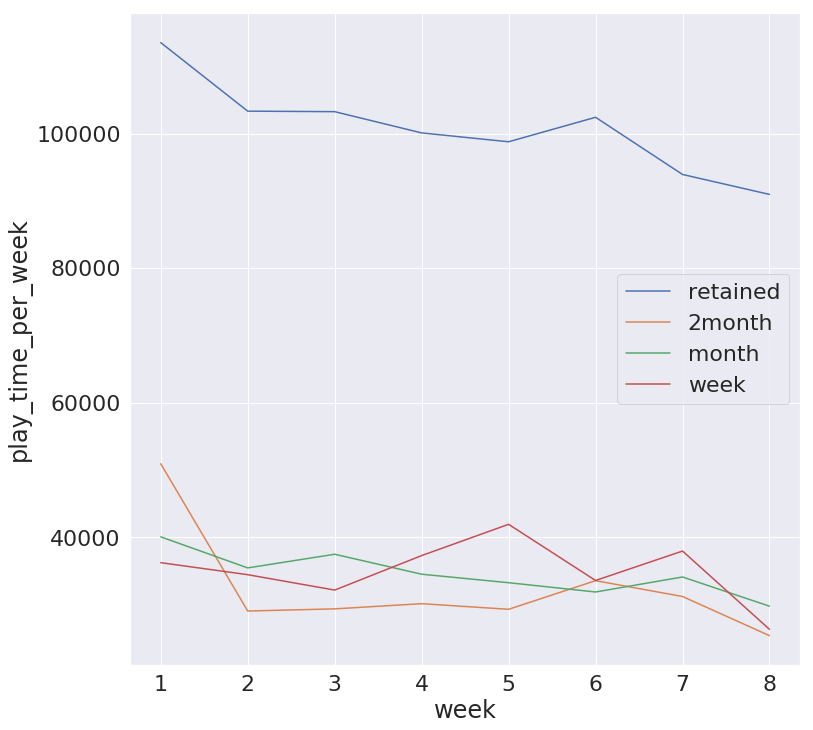

In [23]:
# label 별 접속일수 평균 변화 추이
plt.figure(figsize=(12,12))
plt.plot(play_time_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].mean(), label='retained')
plt.plot(play_time_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='2month'),:].mean(), label='2month')
plt.plot(play_time_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='month'),:].mean(), label='month')
plt.plot(play_time_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='week'),:].mean(), label='week')
plt.legend()
plt.ylabel('play_time_per_week')
plt.xlabel('week')
plt.show()

In [24]:
play_bool_per_week=play_time_per_week.copy()
play_bool_per_week[(play_bool_per_week.isna()==False)]=1
play_bool_per_week=play_bool_per_week.fillna(0)

In [25]:
get_money_per_week=train_act_c.pivot('new_id','wk','get_money')
get_money_per_week=get_money_per_week.reindex(index = get_money_per_week.index.to_series().str.replace('tr','').astype(int).sort_values().index)

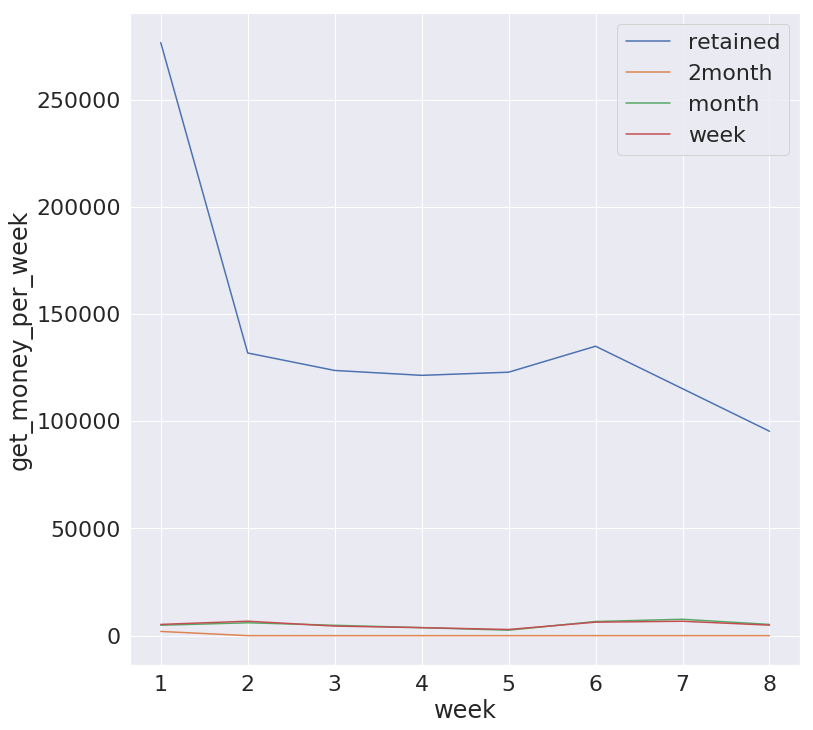

In [26]:
# label 별 접속일수 평균 변화 추이
plt.figure(figsize=(12,12))
plt.plot(get_money_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].median(), label='retained')
plt.plot(get_money_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='2month'),:].median(), label='2month')
plt.plot(get_money_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='month'),:].median(), label='month')
plt.plot(get_money_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='week'),:].median(), label='week')
plt.legend()
plt.ylabel('get_money_per_week')
plt.xlabel('week')
plt.show()

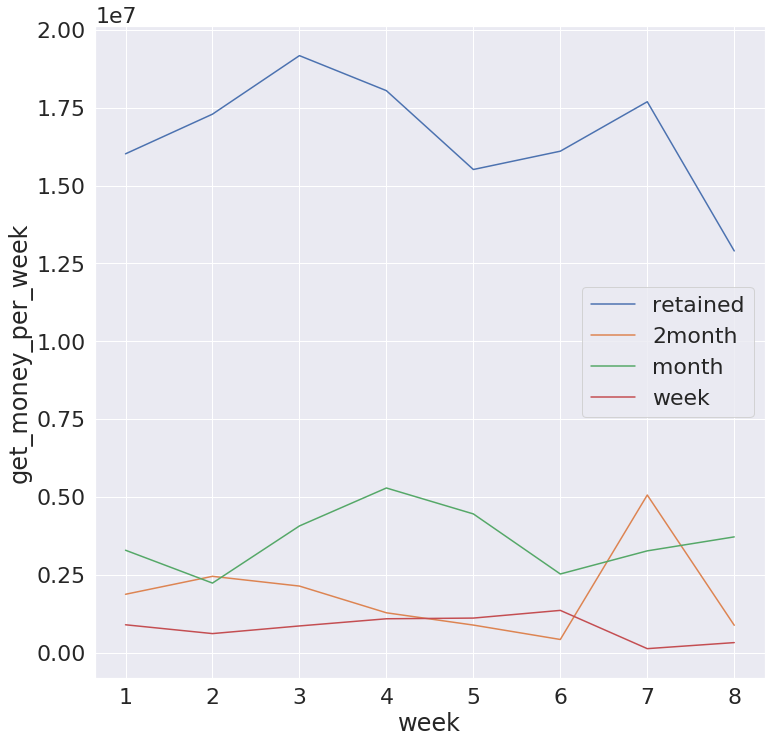

In [27]:
# label 별 접속일수 평균 변화 추이
plt.figure(figsize=(12,12))
plt.plot(get_money_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].sum()/play_bool_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].sum(), label='retained')
plt.plot(get_money_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='2month'),:].sum()/play_bool_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].sum(), label='2month')
plt.plot(get_money_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='month'),:].sum()/play_bool_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].sum(), label='month')
plt.plot(get_money_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='week'),:].sum()/play_bool_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].sum(), label='week')
plt.legend()
plt.ylabel('get_money_per_week')
plt.xlabel('week')
plt.show()

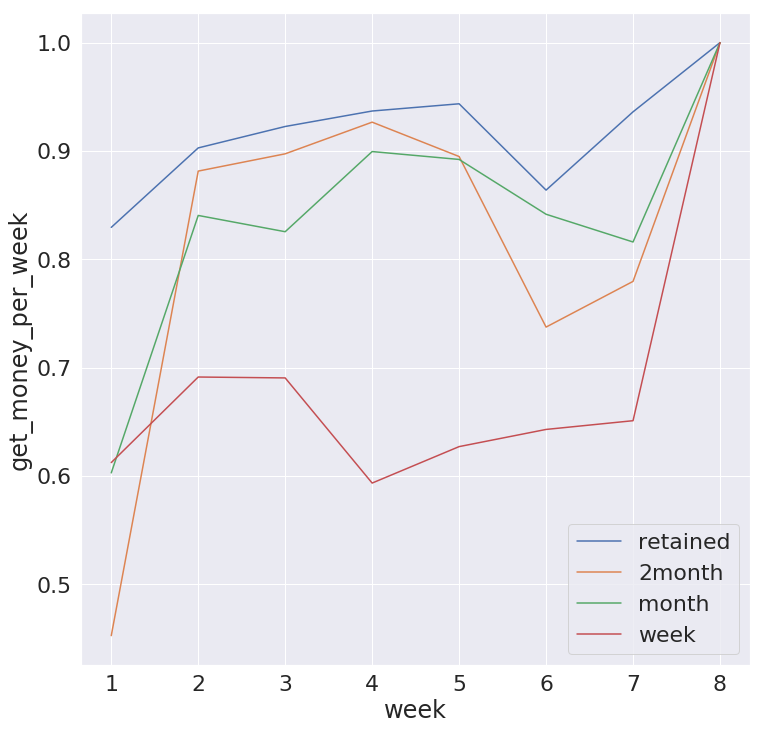

wk
1.0     9815.0
2.0    10683.0
3.0    10917.0
4.0    11086.0
5.0    11165.0
6.0    10222.0
7.0    11077.0
8.0    11833.0
dtype: float64

In [28]:
# label 별 주차별 접속 비율
plt.figure(figsize=(12,12))
plt.plot(play_bool_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].sum()/play_bool_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].sum().iloc[-1], label='retained')
plt.plot(play_bool_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='2month'),:].sum()/play_bool_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='2month'),:].sum().iloc[-1], label='2month')
plt.plot(play_bool_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='month'),:].sum()/play_bool_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='month'),:].sum().iloc[-1], label='month')
plt.plot(play_bool_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='week'),:].sum()/play_bool_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='week'),:].sum().iloc[-1], label='week')
plt.legend()
plt.ylabel('get_money_per_week')
plt.xlabel('week')
plt.show()
play_bool_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].sum()

In [29]:
cnt_enter_inzone_normal_per_week=train_act_c.pivot('new_id','wk','cnt_enter_inzone_normal')
cnt_enter_inzone_normal_per_week=cnt_enter_inzone_normal_per_week.reindex(index = cnt_enter_inzone_normal_per_week.index.to_series().str.replace('tr','').astype(int).sort_values().index)

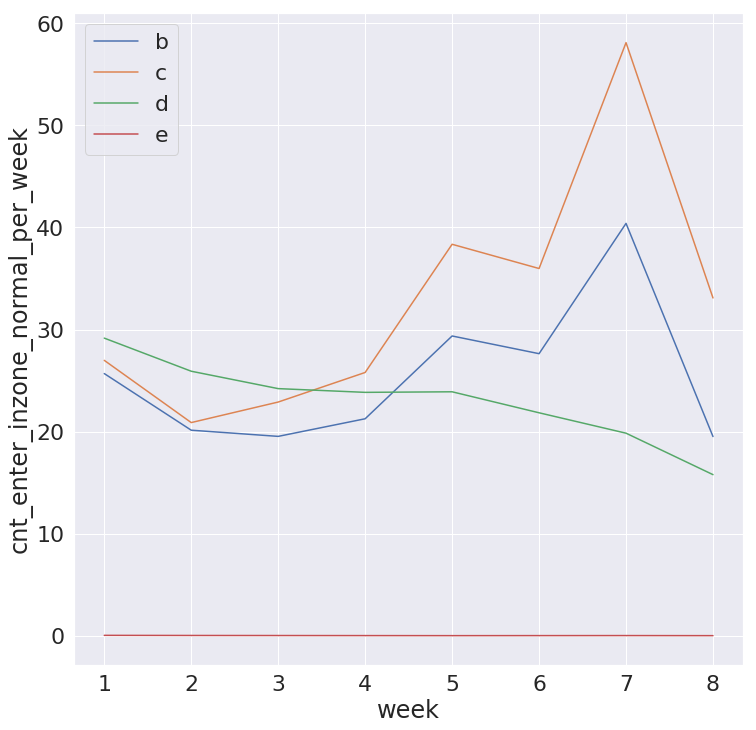

In [30]:
# label 별 평균 인던 입장 회수
plt.figure(figsize=(12,12))
plt.plot(cnt_enter_inzone_normal_per_week.reset_index(drop=True).loc[(train_group_user.group_b)|(train_group_user.group_c),:].mean(), label='b')
plt.plot(cnt_enter_inzone_normal_per_week.reset_index(drop=True).loc[(train_group_user.group_c),:].mean(), label='c')
plt.plot(cnt_enter_inzone_normal_per_week.reset_index(drop=True).loc[(train_group_user.group_d),:].mean(), label='d')
plt.plot(cnt_enter_inzone_normal_per_week.reset_index(drop=True).loc[(train_group_user.group_e),:].mean(), label='e')
plt.legend()
plt.ylabel('cnt_enter_inzone_normal_per_week')
plt.xlabel('week')
plt.show()

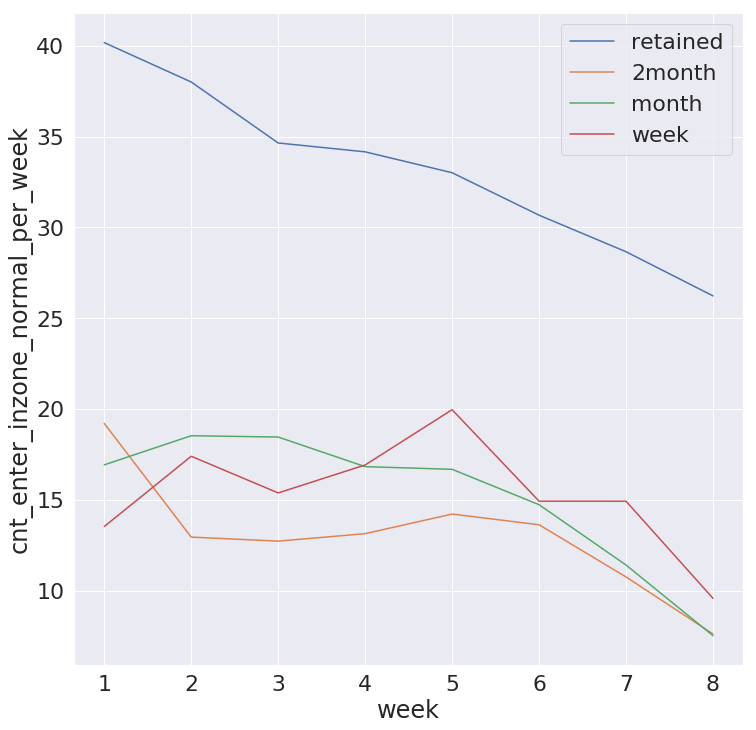

In [31]:
# label 별 평균 인던 입장 회수
plt.figure(figsize=(12,12))
plt.plot(cnt_enter_inzone_normal_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].mean(), label='retained')
plt.plot(cnt_enter_inzone_normal_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='2month'),:].mean(), label='2month')
plt.plot(cnt_enter_inzone_normal_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='month'),:].mean(), label='month')
plt.plot(cnt_enter_inzone_normal_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='week'),:].mean(), label='week')
plt.legend()
plt.ylabel('cnt_enter_inzone_normal_per_week')
plt.xlabel('week')
plt.show()

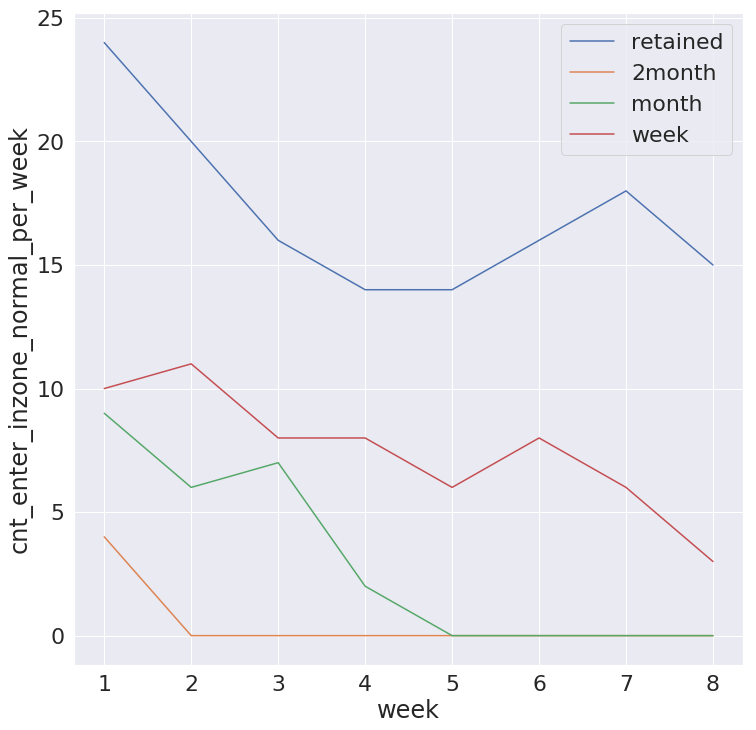

In [32]:
# label 인던 입장 회수
plt.figure(figsize=(12,12))
plt.plot(cnt_enter_inzone_normal_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].median(), label='retained')
plt.plot(cnt_enter_inzone_normal_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='2month'),:].median(), label='2month')
plt.plot(cnt_enter_inzone_normal_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='month'),:].median(), label='month')
plt.plot(cnt_enter_inzone_normal_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='week'),:].median(), label='week')
plt.legend()
plt.ylabel('cnt_enter_inzone_normal_per_week')
plt.xlabel('week')
plt.show()

In [33]:
game_combat_time_per_week=train_act_c.pivot('new_id','wk','game_combat_time')
game_combat_time_per_week=game_combat_time_per_week.reindex(index = game_combat_time_per_week.index.to_series().str.replace('tr','').astype(int).sort_values().index)

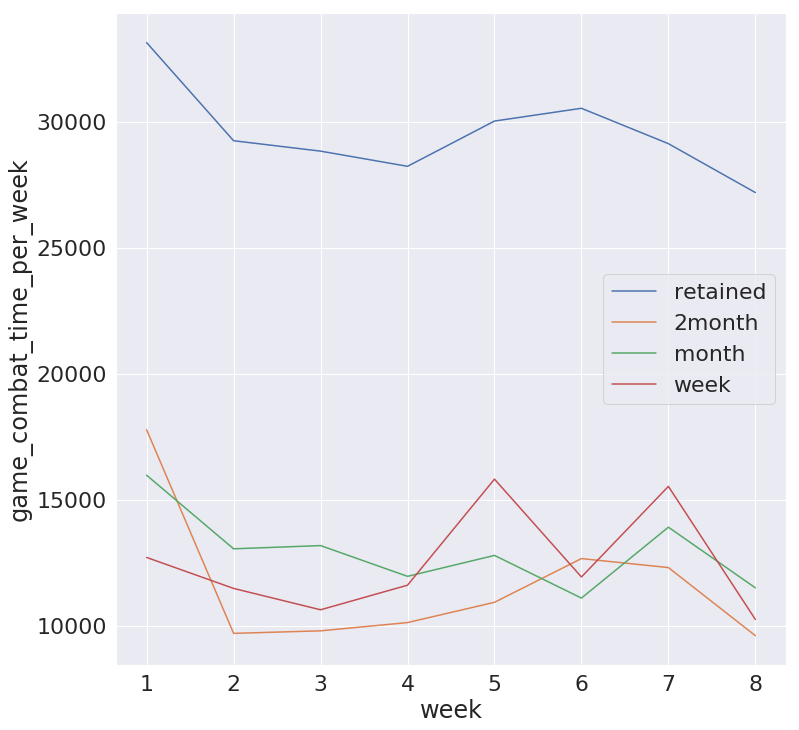

In [34]:
# label 별 평균 인던 입장 회수
plt.figure(figsize=(12,12))
plt.plot(game_combat_time_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].mean(), label='retained')
plt.plot(game_combat_time_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='2month'),:].mean(), label='2month')
plt.plot(game_combat_time_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='month'),:].mean(), label='month')
plt.plot(game_combat_time_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='week'),:].mean(), label='week')
plt.legend()
plt.ylabel('game_combat_time_per_week')
plt.xlabel('week')
plt.show()

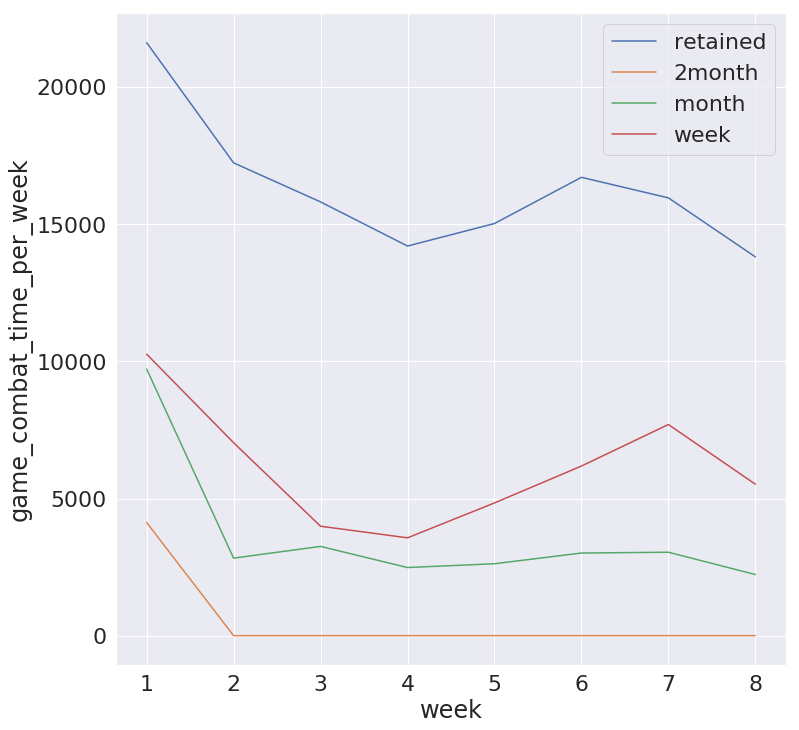

In [35]:
# label 인던 입장 회수
plt.figure(figsize=(12,12))
plt.plot(game_combat_time_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].median(), label='retained')
plt.plot(game_combat_time_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='2month'),:].median(), label='2month')
plt.plot(game_combat_time_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='month'),:].median(), label='month')
plt.plot(game_combat_time_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='week'),:].median(), label='week')
plt.legend()
plt.ylabel('game_combat_time_per_week')
plt.xlabel('week')
plt.show()

In [36]:
payment_amount_per_week=train_act_c.pivot('new_id','wk','payment_amount')
payment_amount_per_week=payment_amount_per_week.reindex(index = payment_amount_per_week.index.to_series().str.replace('tr','').astype(int).sort_values().index)

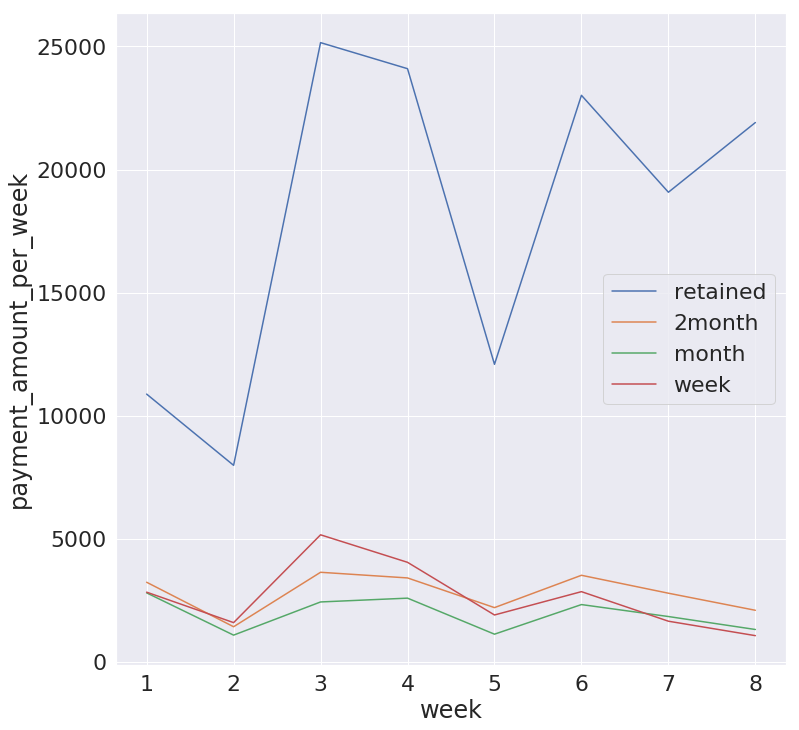

In [37]:
# label 별 평균 인던 입장 회수
plt.figure(figsize=(12,12))
plt.plot(payment_amount_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].mean(), label='retained')
plt.plot(payment_amount_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='2month'),:].mean(), label='2month')
plt.plot(payment_amount_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='month'),:].mean(), label='month')
plt.plot(payment_amount_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='week'),:].mean(), label='week')
plt.legend()
plt.ylabel('payment_amount_per_week')
plt.xlabel('week')
plt.show()

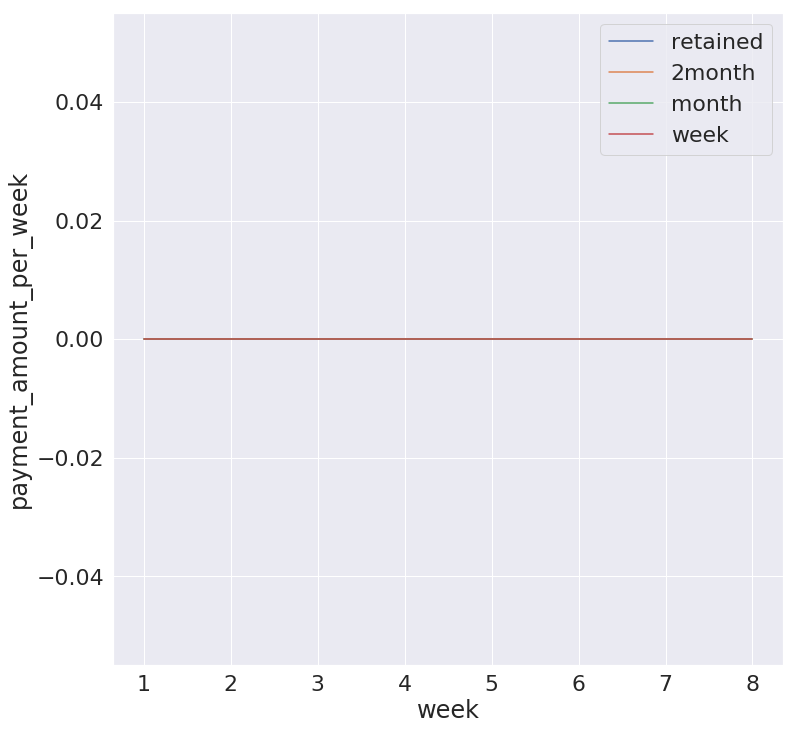

In [38]:
# label 인던 입장 회수
plt.figure(figsize=(12,12))
plt.plot(payment_amount_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].median(), label='retained')
plt.plot(payment_amount_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='2month'),:].median(), label='2month')
plt.plot(payment_amount_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='month'),:].median(), label='month')
plt.plot(payment_amount_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='week'),:].median(), label='week')
plt.legend()
plt.ylabel('payment_amount_per_week')
plt.xlabel('week')
plt.show()

In [39]:
making_cnt_per_week=train_act_c.pivot('new_id','wk','making_cnt')
making_cnt_per_week=making_cnt_per_week.reindex(index = making_cnt_per_week.index.to_series().str.replace('tr','').astype(int).sort_values().index)

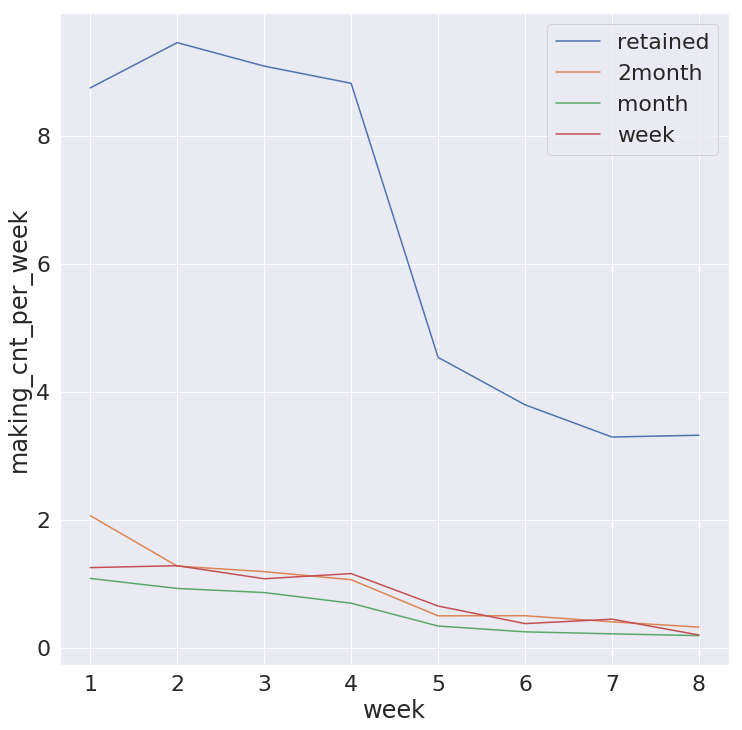

In [40]:
# label 별 평균 인던 입장 회수
plt.figure(figsize=(12,12))
plt.plot(making_cnt_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].mean(), label='retained')
plt.plot(making_cnt_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='2month'),:].mean(), label='2month')
plt.plot(making_cnt_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='month'),:].mean(), label='month')
plt.plot(making_cnt_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='week'),:].mean(), label='week')
plt.legend()
plt.ylabel('making_cnt_per_week')
plt.xlabel('week')
plt.show()

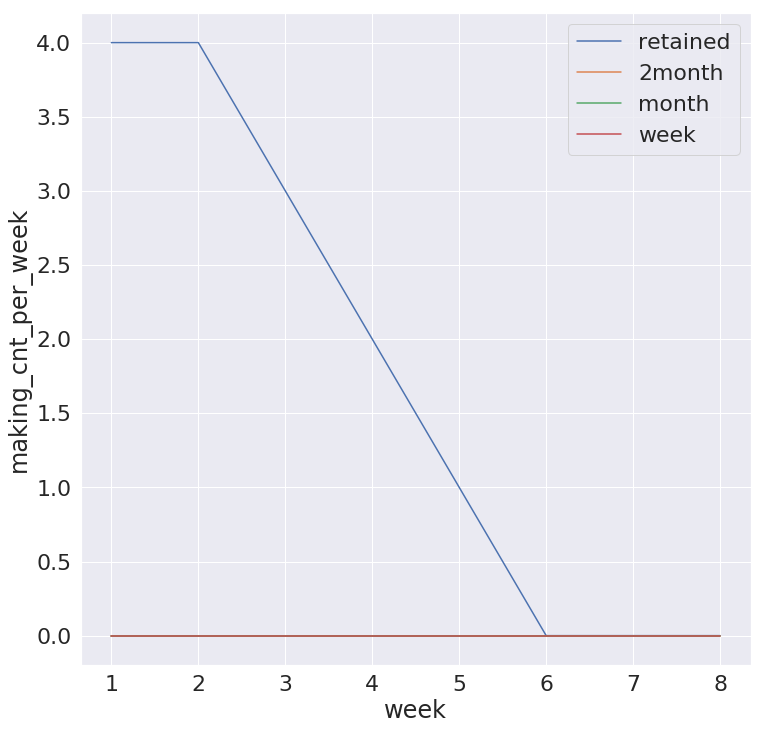

In [41]:
# label 인던 입장 회수
plt.figure(figsize=(12,12))
plt.plot(making_cnt_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='retained'),:].median(), label='retained')
plt.plot(making_cnt_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='2month'),:].median(), label='2month')
plt.plot(making_cnt_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='month'),:].median(), label='month')
plt.plot(making_cnt_per_week.reset_index(drop=True).loc[(train_group_user.group_d)&(labels.label=='week'),:].median(), label='week')
plt.legend()
plt.ylabel('making_cnt_per_week')
plt.xlabel('week')
plt.show()

In [42]:
X_train_final=pd.read_csv('X_train_final.csv')

In [43]:
X_train_final.columns.tolist()

['play_time_Count',
 'cnt_enter_inzone_skilled_Count',
 'making_cnt_Count',
 'normal_chat_median_basic_time',
 'first_week_cnt_clear_raid_light',
 'cnt_enter_raid_light_range_stat',
 'payment_amount_MA_5_basic_time',
 'duel_cnt_sum_stat',
 'trade_InDeg',
 'partybattle_cnt_sum_stat',
 'payment_amount_median_basic_time',
 'partybattle_cnt_max_stat',
 'payment_amount_kurt_basic_time',
 'cnt_enter_raid_light_median_stat',
 'guild_chat_MA_1_basic_time',
 'whisper_chat_Count',
 'cnt_enter_inzone_light_Count',
 'payment_amount_MA_1_basic_time',
 'cnt_enter_raid_light_max_stat',
 'payment_amount_by_play_time',
 'normal_chat_MA_2_basic_time',
 'cnt_dt_Count',
 'normal_chat_MA_1_basic_time',
 'payment_amount_MA_3_basic_time',
 'cnt_enter_raid_light_Count',
 'district_chat_max_stat',
 'payment_amount_min_stat',
 'first_week_making_cnt',
 'payment_amount_MA_4_basic_time',
 'cnt_use_buffitem_Count',
 'game_combat_time_Count',
 'first_week_cnt_clear_inzone_solo',
 'party_cnt_with4_median',
 'inzone_

In [44]:
print(X_train_final.play_time_mean_time_series.loc[(train_group_user.group_a)|(train_group_user.group_b)].describe(),
X_train_final.play_time_mean_time_series.loc[(train_group_user.group_c)].describe(),
X_train_final.play_time_mean_time_series.loc[(train_group_user.group_d)].describe(),
X_train_final.play_time_mean_time_series.loc[(train_group_user.group_e)].describe())

count     24430.000000
mean       9117.674816
std       27684.022545
min          23.250000
25%         183.250000
50%         270.875000
75%        2207.843750
max      499159.250000
Name: play_time_mean_time_series, dtype: float64 count     29193.000000
mean      64439.803562
std       64557.251247
min          89.250000
25%       17927.875000
50%       37119.750000
75%       88089.250000
max      532116.375000
Name: play_time_mean_time_series, dtype: float64 count     27775.000000
mean      54387.654361
std       77356.190441
min          13.375000
25%         560.187500
50%       15164.000000
75%       83741.750000
max      564797.250000
Name: play_time_mean_time_series, dtype: float64 count     18602.000000
mean       1949.748461
std       21207.172549
min           0.125000
25%          36.625000
50%         122.562500
75%         407.218750
max      553091.625000
Name: play_time_mean_time_series, dtype: float64


In [45]:
print(X_train_final.item_hongmun_max_stat.loc[(train_group_user.group_d)&(labels.label=='retained')].describe(),
X_train_final.item_hongmun_max_stat.loc[(train_group_user.group_d)&(labels.label=='2month')].describe(),
X_train_final.item_hongmun_max_stat.loc[(train_group_user.group_d)&(labels.label=='month')].describe(),
X_train_final.item_hongmun_max_stat.loc[(train_group_user.group_d)&(labels.label=='week')].describe())

count     9837.000000
mean       960.179628
std       1385.173308
min          1.000000
25%        252.000000
50%        550.000000
75%       1070.000000
max      25276.000000
Name: item_hongmun_max_stat, dtype: float64 count     2141.000000
mean       354.134984
std        651.702594
min          1.000000
25%         36.000000
50%        196.000000
75%        381.000000
max      11112.000000
Name: item_hongmun_max_stat, dtype: float64 count    3705.000000
mean      181.603239
std       464.805680
min         1.000000
25%        27.000000
50%        40.000000
75%       182.000000
max      9759.000000
Name: item_hongmun_max_stat, dtype: float64 count     2809.000000
mean       145.330367
std        531.808457
min          1.000000
25%         32.000000
50%         42.000000
75%         80.000000
max      17414.000000
Name: item_hongmun_max_stat, dtype: float64


In [46]:
print(X_train_final.get_money_by_play_time.loc[(train_group_user.group_d)&(labels.label=='retained')].describe(),
X_train_final.get_money_by_play_time.loc[(train_group_user.group_d)&(labels.label=='2month')].describe(),
X_train_final.get_money_by_play_time.loc[(train_group_user.group_d)&(labels.label=='month')].describe(),
X_train_final.get_money_by_play_time.loc[(train_group_user.group_d)&(labels.label=='week')].describe())

count     11833.000000
mean        146.988972
std        2579.089768
min           0.000000
25%           0.313282
50%           4.476414
75%          32.930881
max      153362.595456
Name: get_money_by_play_time, dtype: float64 count      6021.000000
mean        133.079133
std        6844.049414
min           0.000000
25%           0.000000
50%           0.000000
75%           0.330179
max      516411.387111
Name: get_money_by_play_time, dtype: float64 count    6.325000e+03
mean     9.691996e+02
std      7.312449e+04
min      0.000000e+00
25%      0.000000e+00
50%      3.218101e-01
75%      1.006915e+00
max      5.813925e+06
Name: get_money_by_play_time, dtype: float64 count    3.596000e+03
mean     4.438003e+02
std      2.015911e+04
min      0.000000e+00
25%      2.024689e-01
50%      2.902329e-01
75%      8.319407e-01
max      1.193819e+06
Name: get_money_by_play_time, dtype: float64


In [47]:
print((X_train_final.partybattle_cnt_sum_stat.loc[(train_group_user.group_d)&(labels.label=='retained')]/X_train_final.play_time_sum_stat.loc[(train_group_user.group_d)&(labels.label=='retained')]).describe(),
(X_train_final.partybattle_cnt_sum_stat.loc[(train_group_user.group_d)&(labels.label=='2month')]/X_train_final.play_time_sum_stat.loc[(train_group_user.group_d)&(labels.label=='2month')]).describe(),
(X_train_final.partybattle_cnt_sum_stat.loc[(train_group_user.group_d)&(labels.label=='month')]/X_train_final.play_time_sum_stat.loc[(train_group_user.group_d)&(labels.label=='month')]).describe(),
(X_train_final.partybattle_cnt_sum_stat.loc[(train_group_user.group_d)&(labels.label=='week')]/X_train_final.play_time_sum_stat.loc[(train_group_user.group_d)&(labels.label=='week')]).describe())

count    4.112000e+03
mean     1.532256e-04
std      2.099362e-04
min      2.496179e-07
25%      1.380713e-05
50%      7.057279e-05
75%      2.020238e-04
max      1.566472e-03
dtype: float64 count    6.120000e+02
mean     4.138251e-04
std      3.588332e-04
min      4.351644e-07
25%      4.342155e-05
50%      3.626638e-04
75%      7.649102e-04
max      1.299510e-03
dtype: float64 count    2.840000e+02
mean     2.922320e-04
std      3.747871e-04
min      3.272521e-07
25%      1.622267e-05
50%      6.771031e-05
75%      5.936191e-04
max      1.203299e-03
dtype: float64 count    4.040000e+02
mean     2.775445e-04
std      2.741139e-04
min      9.763470e-07
25%      8.814313e-05
50%      1.783984e-04
75%      3.836724e-04
max      1.233937e-03
dtype: float64


In [48]:
plt.plot((X_train_final.partybattle_cnt_sum_stat.loc[(train_group_user.group_d)&(labels.label=='retained')]/X_train_final.play_time_sum_stat.loc[(train_group_user.group_d)&(labels.label=='retained')]).describe()
(X_train_final.partybattle_cnt_sum_stat.loc[(train_group_user.group_d)&(labels.label=='2month')]/X_train_final.play_time_sum_stat.loc[(train_group_user.group_d)&(labels.label=='2month')]).describe(),
(X_train_final.partybattle_cnt_sum_stat.loc[(train_group_user.group_d)&(labels.label=='month')]/X_train_final.play_time_sum_stat.loc[(train_group_user.group_d)&(labels.label=='month')]).describe(),
(X_train_final.partybattle_cnt_sum_stat.loc[(train_group_user.group_d)&(labels.label=='week')]/X_train_final.play_time_sum_stat.loc[(train_group_user.group_d)&(labels.label=='week')]).describe())

TypeError: 'Series' object is not callable

In [ ]:
print(X_train_final.district_chat_sum_stat.loc[(train_group_user.group_d)&(labels.label=='retained')].describe(),
X_train_final.district_chat_sum_stat.loc[(train_group_user.group_d)&(labels.label=='2month')].describe(),
X_train_final.district_chat_sum_stat.loc[(train_group_user.group_d)&(labels.label=='month')].describe(),
X_train_final.district_chat_sum_stat.loc[(train_group_user.group_d)&(labels.label=='week')].describe())

In [ ]:
print(X_train_final.guild_chat_mean_basic_time.loc[(train_group_user.group_d)&(labels.label=='retained')].describe(),
X_train_final.guild_chat_mean_basic_time.loc[(train_group_user.group_d)&(labels.label=='2month')].describe(),
X_train_final.guild_chat_mean_basic_time.loc[(train_group_user.group_d)&(labels.label=='month')].describe(),
X_train_final.guild_chat_mean_basic_time.loc[(train_group_user.group_d)&(labels.label=='week')].describe())

In [ ]:
retain_playtime_users=play_time_per_week.reset_index(drop=True).loc[(train_data.group_c)&(labels['label']=='retained'),:].fillna(0).apply((lambda x:plt.plot([1,2,3,4,5,6,7,8],np.array(x), c = 'r', marker= '1',alpha=0.1)),1)

In [ ]:
towmonth_playtime_users=play_time_per_week.reset_index(drop=True).loc[(train_data.group_c)&(labels['label']=='2month'),:].fillna(0).apply((lambda x:plt.plot([1,2,3,4,5,6,7,8],np.array(x), c = 'r', marker= '1',alpha=0.1)),1)

In [ ]:
onemonth_playtime_users=play_time_per_week.reset_index(drop=True).loc[(train_data.group_c)&(labels['label']=='month'),:].fillna(0).apply((lambda x:plt.plot([1,2,3,4,5,6,7,8],np.array(x), c = 'r', marker= '1',alpha=0.1)),1)

In [ ]:
week_playtime_users=play_time_per_week.reset_index(drop=True).loc[(train_data.group_c)&(labels['label']=='week'),:].fillna(0).apply((lambda x:plt.plot([1,2,3,4,5,6,7,8],np.array(x), c = 'r', marker= '1',alpha=0.1)),1)

In [ ]:
[i for i in play_time_per_week.loc[(train_data.group_c)&(labels_copy['label']==i),:]]

In [ ]:
labels_copy

----

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from pprint import pprint
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier # rf분류기

In [ ]:
train_data=pd.read_csv('X_train_final.csv')
test_data=pd.read_csv('X_test_final.csv')

In [ ]:
train_data['party_enter_differ_ratio']=train_party_ratio.iloc[:,1]
test_data['party_enter_differ_ratio']=test_party_ratio.iloc[:,1]

In [ ]:
#### training_validation 나누기!!!
def separating(X,y):
    np.random.seed(7)
    index_where=[]
    index_choosed=[]
    index_boolean=np.zeros(len(y),np.bool)
    for i in range(4):
        index_where.append(np.where(y==i)[0])
    for j in range(4):
        index_choosed.append(np.random.choice(index_where[j],int(sum(y==j)*0.9),replace = False))
    for k in range(4):
        print(index_choosed[k])
        index_boolean[index_choosed[k]]=1
    return X[index_boolean], X[index_boolean==0],y[index_boolean], y[index_boolean==0]

In [ ]:
def F1(y_pred, dtrain):
    labels = dtrain
    
    pre = precision_score(y_true = labels, y_pred = y_pred, average=None)
    rec = recall_score(y_true = labels, y_pred = y_pred, average=None)
    f1_score = 8/(sum(1/pre) + sum(1/rec))

    return 'f1', f1_score

In [ ]:
#### load class
train_label = pd.read_csv('lite_data//train_label_lite.csv')
hasher = pd.read_csv('test_id.csv')
label_map = {'retained':0,'2month':1,'month':2,'week':3}
y_train = pd.Series([label_map[l] for l in train_label.label])
inv_map = {label_map[k]:k for k in label_map.keys()}

In [ ]:
#### xgb
grid_result = []
param = {}
#### XGB parameters
## General Parameters
param['n_gpus'] = -1
param['tree_method'] = 'gpu_hist'
param['silent'] = 0

## Booster Parameters
param['n_estimators'] = 224 #요기...
param['learning_rate'] = 0.1
param['min_child_weight'] = 6.5
param['max_depth'] = 13
param['gamma'] = 0.1
param['reg_alpha'] =0.01
param['reg_lambda'] = 0.05
param['subsample'] = 0.9
param['colsample_bytree'] = 0.75
param['scale_pos_weight'] = 1

## Learning task parameters
param['num_class'] = 4
param['objective'] = 'multi:softmax'
param['seed'] = 7

## update?
#param['process_type'] = 'update'
#param['updater'] = 'refresh'
#param['refresh_leaf'] = True
model = xgb.XGBClassifier(**param)

In [ ]:
train_data_c=train_data.iloc[:,:-5]

In [ ]:
test_data_c=test_data.iloc[:,:-5]

In [ ]:
X_train_first_dreft=train_data_c[(train_data.group_a)|(train_data.group_b)].reset_index(drop=True)
y_train=y_train[(train_data.group_a)|(train_data.group_b)].reset_index(drop=True)

In [ ]:
X_test_first_dreft=test_data_c[(test_data.group_a)|(test_data.group_b)].reset_index(drop=True)

In [ ]:
hongmun_kfold = StratifiedKFold(n_splits = 5 ,random_state = 7,shuffle=True).split(X_train_first_dreft, y_train)
scores = []
predict_set = []
for k, (train, test) in enumerate(hongmun_kfold):
    model.fit(X_train_first_dreft.iloc[train,:], y_train[train],eval_metric = F1)  ####요부분 trimming
    score = model.score(X_train_first_dreft.iloc[test,:], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, F1: %.3f' % (k+1,np.bincount(y_train[train]), score))
    ### predict
    y_pred1 = model.predict(X_train_first_dreft.iloc[test,:])
    predict_set += [(x,inv_map[y_pred1[i]]) for i,x in enumerate(test)]
    last_test1=test
print('\nCV F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:
X_train_first_dreft